<div style="text-align:center">
    <h1>Fandango Movie Score Analysis</h1>
</div>

## Overview

Let's say it is Friday night, and there is a new movie in the theater and you are in the mood to watch a good movie. You open up an app that allows you to read the reviews, ratings, and online ticket booking.

Now, You just remember that when the last time you selected a movie with a 4.5-star rating but the movie wasn't that great. So this time you're wondering how well can you trust these online reviews and ratings by the same company that sells the tickets as well. Do they have a bias towards rating a movie higher?

For a better understanding of the context and data, read this amazing article 
[Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/)

<div style="text-align:center">
<img src="https://media4.giphy.com/media/1zRdkULjknNO7aw2Bt/giphy.gif?cid=790b7611f7ecac50f4a7e99edecfdbc761a04dac7d840575&rid=giphy.gif&ct=g" width="300" height="370"></img> </div>
<div style="text-align:center"><a href="https://giphy.com/gifs/sptv-season-1-101-la-finest-1zRdkULjknNO7aw2Bt">via GIPHY</a></div>

### The Data

The is the data behind the story [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/) is available on 538's github: https://github.com/fivethirtyeight/data.

There are two csv files,
#### all_sites_scores.csv

This file has Rotten Tomato ratings, RT User rating, Metacritic score, a Metacritic User score, and IMDb score for the movie


Column | Definition
--- | ---
FILM | The movie
RottenTomatoes | The Rotten Tomatoes Tomatometer score
RottenTomatoes_User | The Rotten Tomatoes user score
Metacritic | The Metacritic critic score 
Metacritic_User | The Metacritic user score
IMDB | The IMDb user score
Metacritic_user_vote_count | The number of user votes the on Metacritic
IMDB_user_vote_count | The number of user votes on IMDb

#### fandango_scape.csv

The films pulled from the fandango

Column | Definition
--- | ---
FILM | The movie
START | Number of starts on fandango
RATINGS | Actual average score that movie obtained
VOTES | Number of people who reviewed the movie

##### NOTE - This all data was pulled in 2015*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
def adjust_plot_size():
    return plt.figure(figsize=(12,6), dpi=150)

Let's first explore the fandango ratings to see if our analysis matches with me article's 
conclusion. 

In [5]:
df_fandango = pd.read_csv('./DATA/fandango_scrape.csv')

In [6]:
df_fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [7]:
df_fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [11]:
df_fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


 Note we have average rating of 3.37 and 3.5 for starts

So more the popular the movie higher the rating? let's plot scatter plot and find out.

<AxesSubplot:xlabel='RATING', ylabel='VOTES'>

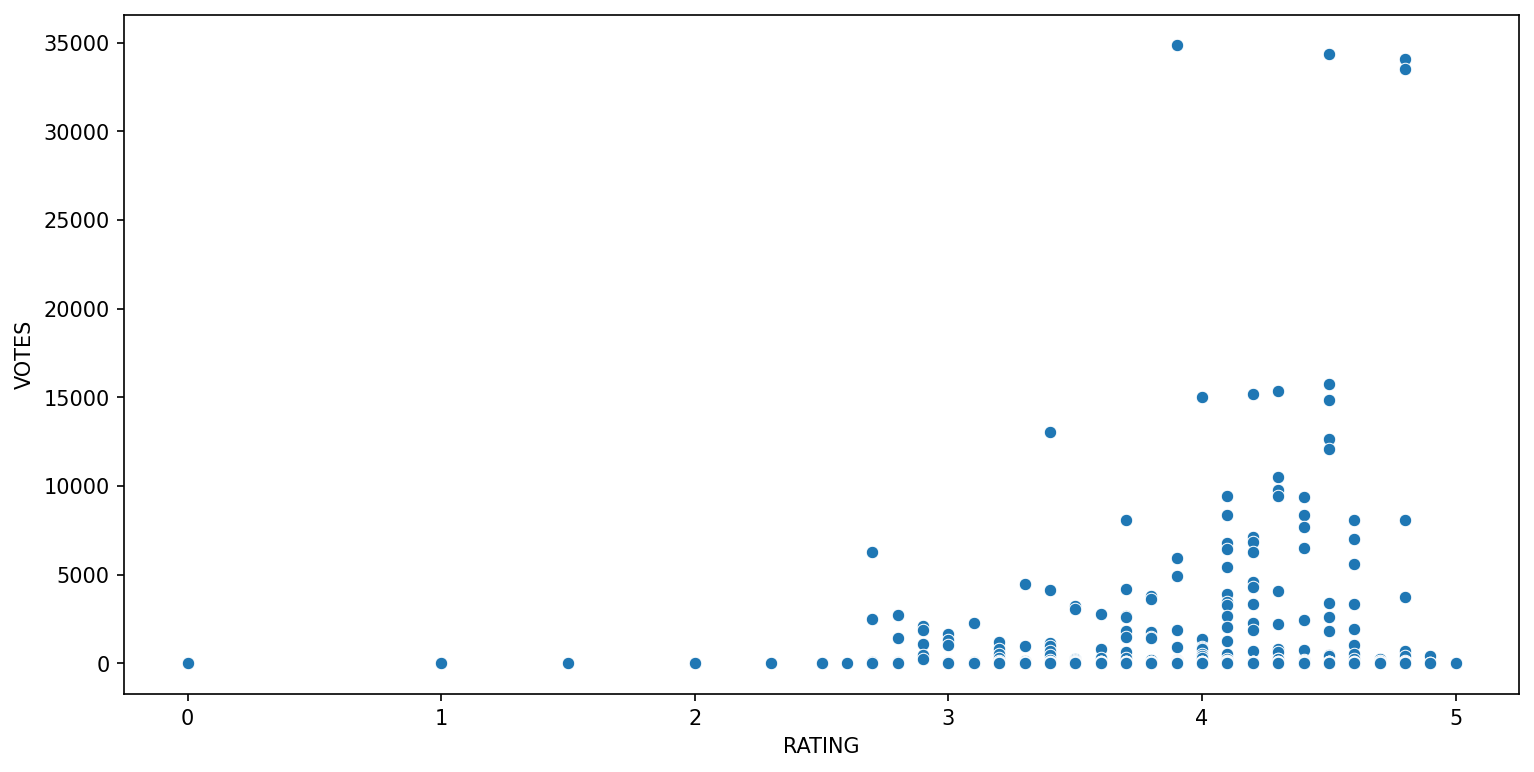

In [97]:
adjust_plot_size()
sns.scatterplot(data=df_fandango,y="VOTES",x="RATING")

<AxesSubplot:xlabel='STARS', ylabel='VOTES'>

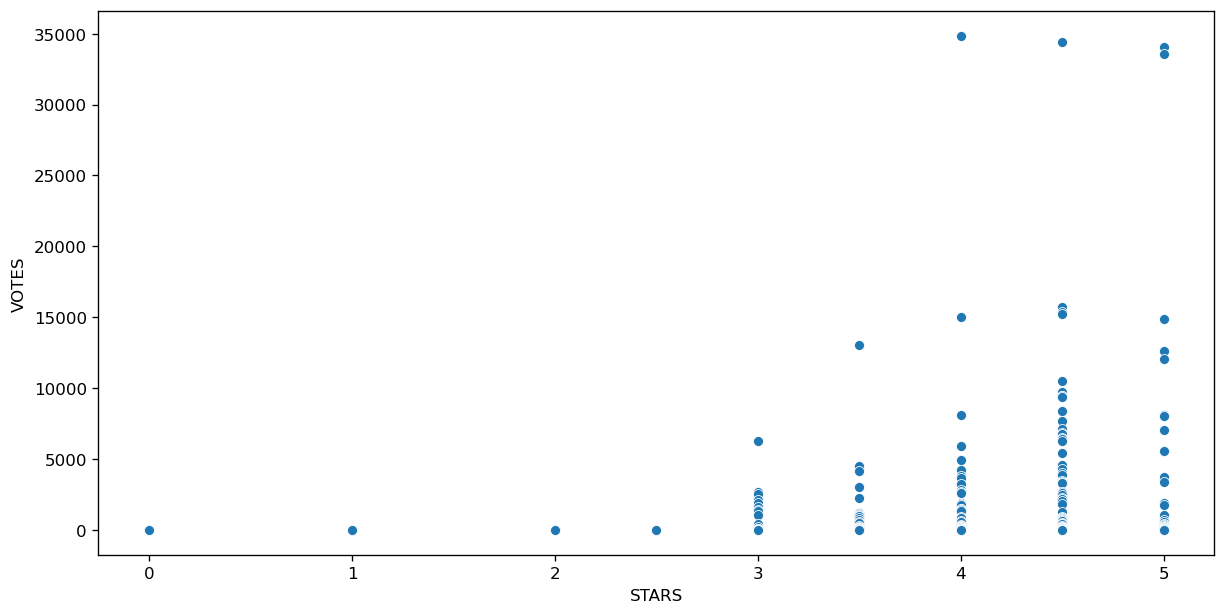

In [17]:
plt.figure(figsize=(12,6),dpi=120)
sns.scatterplot(data=df_fandango,y="VOTES",x="STARS")

In [18]:
df_fandango.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


In [20]:
df_fandango["FILM"].head()

0    Fifty Shades of Grey (2015)
1          Jurassic World (2015)
2         American Sniper (2015)
3               Furious 7 (2015)
4              Inside Out (2015)
Name: FILM, dtype: object

In [37]:
# assuming every row in column has same format
# extract the year from film
df_fandango["FILM"][52].split("(")[-1][:-1]

'2015'

In [42]:
df_fandango["YEAR"] =  df_fandango['FILM'].apply(lambda title:title.split('(')[-1][:-1])

In [43]:
df_fandango["YEAR"].head()

0    2015
1    2015
2    2015
3    2015
4    2015
Name: YEAR, dtype: object

In [44]:
df_fandango["YEAR"].value_counts()

2015    478
2014     23
2016      1
1964      1
2012      1
Name: YEAR, dtype: int64

Text(0, 0.5, 'No of movies')

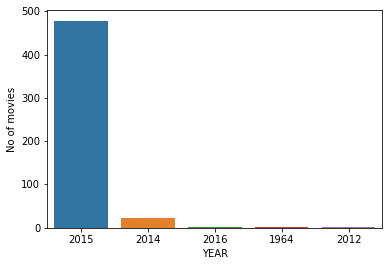

In [49]:
sns.countplot(data=df_fandango,x="YEAR")
plt.ylabel("No of movies")

Most of the movies in this dataset are from 2015, Which is true considering the fact that
data is from 2015.

In [52]:
# top 10 movies with highest number of votes

df_fandango.nlargest(10,"VOTES")

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


In [55]:
# movies with zero votes
(df_fandango["VOTES"] == 0).sum()

69

In [56]:
# remove the movies with 0 votes and create DF

df_reviewed = df_fandango[df_fandango["VOTES"] > 0]

In [57]:
df_reviewed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 435 entries, 0 to 434
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    435 non-null    object 
 1   STARS   435 non-null    float64
 2   RATING  435 non-null    float64
 3   VOTES   435 non-null    int64  
 4   YEAR    435 non-null    object 
dtypes: float64(2), int64(1), object(2)
memory usage: 20.4+ KB


As mentioned in the Article due to HTML and the star rating displays, the rating shown to
user could be different than the actual rating.
Let's visualize using the distribution plots

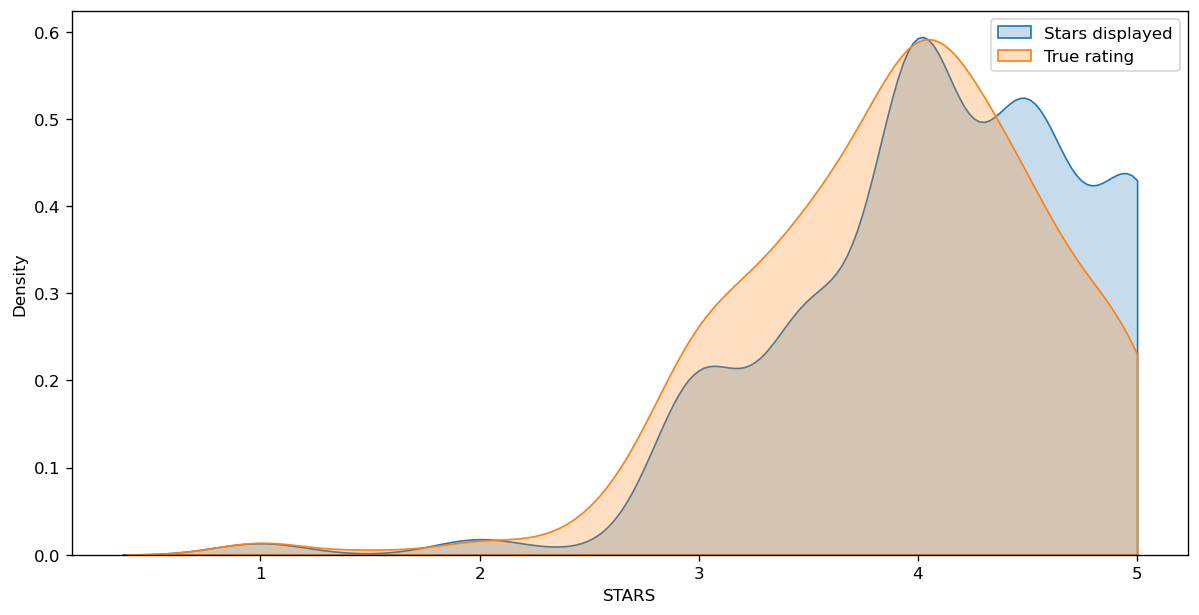

In [62]:
plt.figure(figsize=(12,6),dpi=120)
sns.kdeplot(data=df_reviewed["STARS"],clip=[0,5],fill=True, label ="Stars displayed")
sns.kdeplot(data=df_reviewed["RATING"],clip=[0,5],fill=True, label ="True rating")
plt.legend()

As we can observe there is some discrepancy between Star displayed vs actual rating.

We'll create a new column with the difference between, displayed start and true rating,
will round off it to nearest decimal point.

In [ ]:
## https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas

In [65]:
df_diff_star =  df_reviewed["STARS"] - df_reviewed["RATING"]

In [66]:
df_reviewed["STAR_DIFF"] = df_diff_star

/var/folders/pg/75crsnx12fb3_jqnr8vkvj640000gn/T/ipykernel_1697/2331278673.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reviewed["STAR_DIFF"] = df_diff_star


In [67]:
# workaround
df_reviewed = df_reviewed.copy()

In [68]:
df_diff_star =  df_reviewed["STARS"] - df_reviewed["RATING"]
df_reviewed["STAR_DIFF"] = df_diff_star

In [69]:
df_reviewed["STAR_DIFF"].head()

0    0.1
1    0.0
2    0.2
3    0.2
4    0.0
Name: STAR_DIFF, dtype: float64

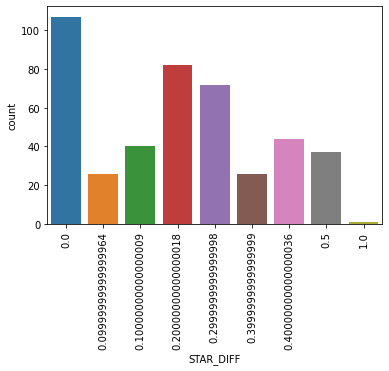

In [72]:
# no of time each difference occurs
sns.countplot(data=df_reviewed,x="STAR_DIFF")
plt.xticks(rotation = 90);

In [73]:
# we will round off to nearest decimal
df_reviewed["STAR_DIFF"] = df_reviewed["STAR_DIFF"].round(2)

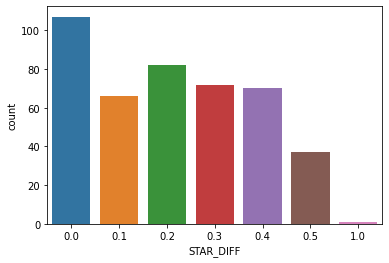

In [76]:
# no of time each difference occurs
sns.countplot(data=df_reviewed,x="STAR_DIFF")
plt.xticks(rotation = 0);

In [77]:
# There is one movie that has star difference of one compared to true rating.
df_reviewed[df_reviewed["STAR_DIFF"] == 1]

,FILM,STARS,RATING,VOTES,YEAR,STAR_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


#### Now let's compare the fandango scores with other movie sites. 

In [153]:
df_all_sites = pd.read_csv("./DATA/all_sites_scores.csv")

In [154]:
df_all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [155]:
df_all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [156]:
df_all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


Let's explore reviews by other sites.
#### Rotten Tomatoes

It has tow reviews one is published by critics(official critics) and by the users

let's plot the distribution to fine correlation between critic review and user's review

<AxesSubplot:xlabel='RottenTomatoes', ylabel='RottenTomatoes_User'>

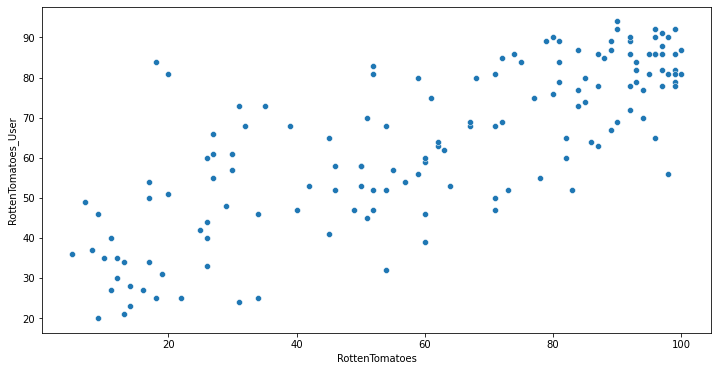

In [157]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df_all_sites,x="RottenTomatoes", y="RottenTomatoes_User")

Let's quantify the rating difference between critic and the normal user. we will calculate
Diff  = RottenTomatoes - RottenTomatoes_User

    If value is zero that means both user and critic think same rating for given movie.
    If we have positive values -> critic give more score than user
    If we have negative values -> user's give more score than critic

In [158]:
df_all_sites = df_all_sites.copy()

In [159]:
df_all_sites["Rotten_Diff"] = df_all_sites["RottenTomatoes"] - df_all_sites["RottenTomatoes_User"]

In [160]:
df_all_sites["Rotten_Diff"].head()

0   -12
1     5
2   -10
3   -66
4   -14
Name: Rotten_Diff, dtype: int64

In [161]:
df_all_sites["Rotten_Diff"].apply(abs).mean()

15.095890410958905

Text(0.5, 1.0, "RT Critic score - RT User's score")

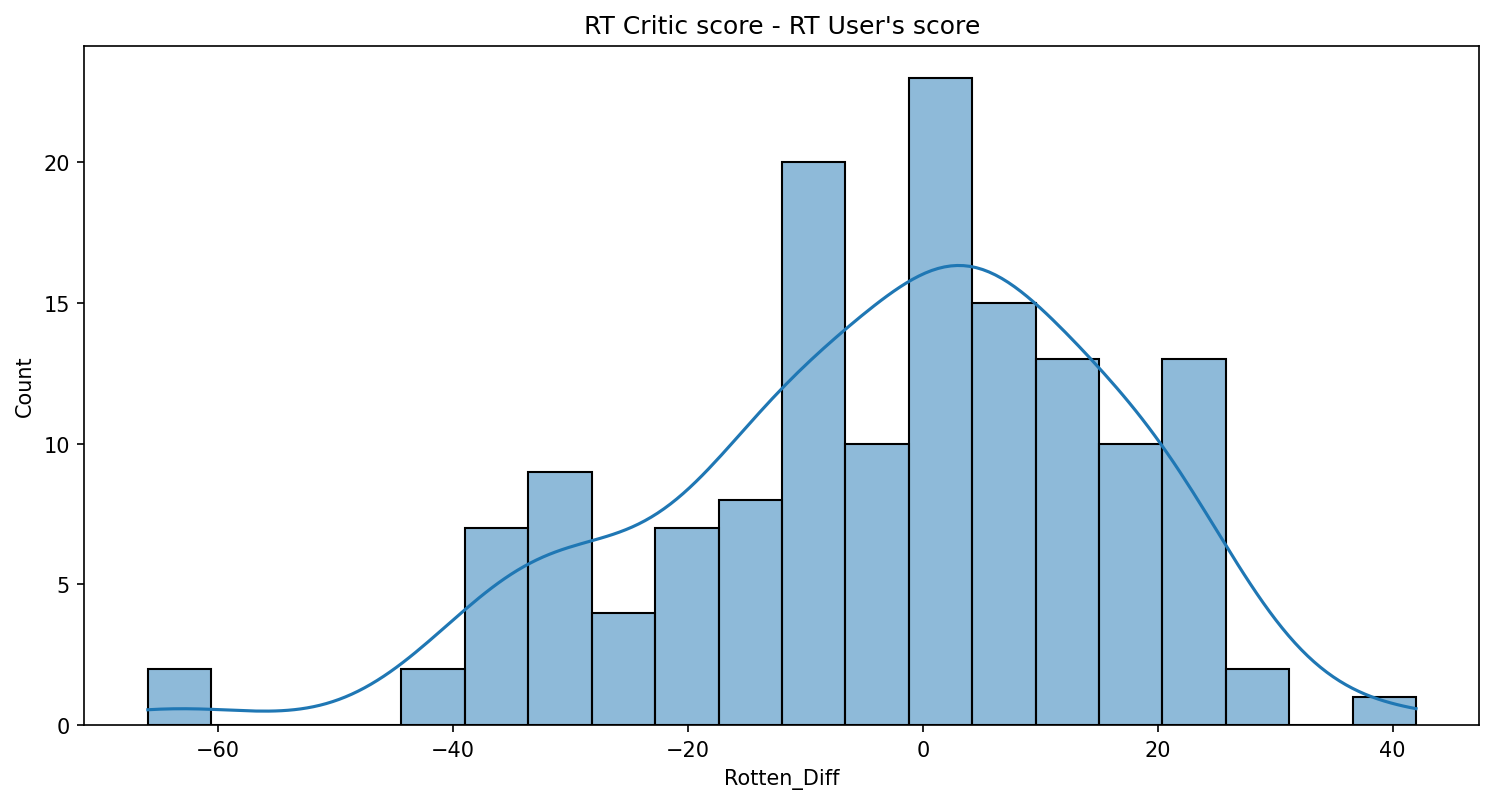

In [162]:
# let's plot the difference 
adjust_plot_size()
sns.histplot(data=df_all_sites["Rotten_Diff"],kde=True,bins=20)
plt.title("RT Critic score - RT User's score")

Text(0.5, 1.0, 'Absolute values difference between critic and user')

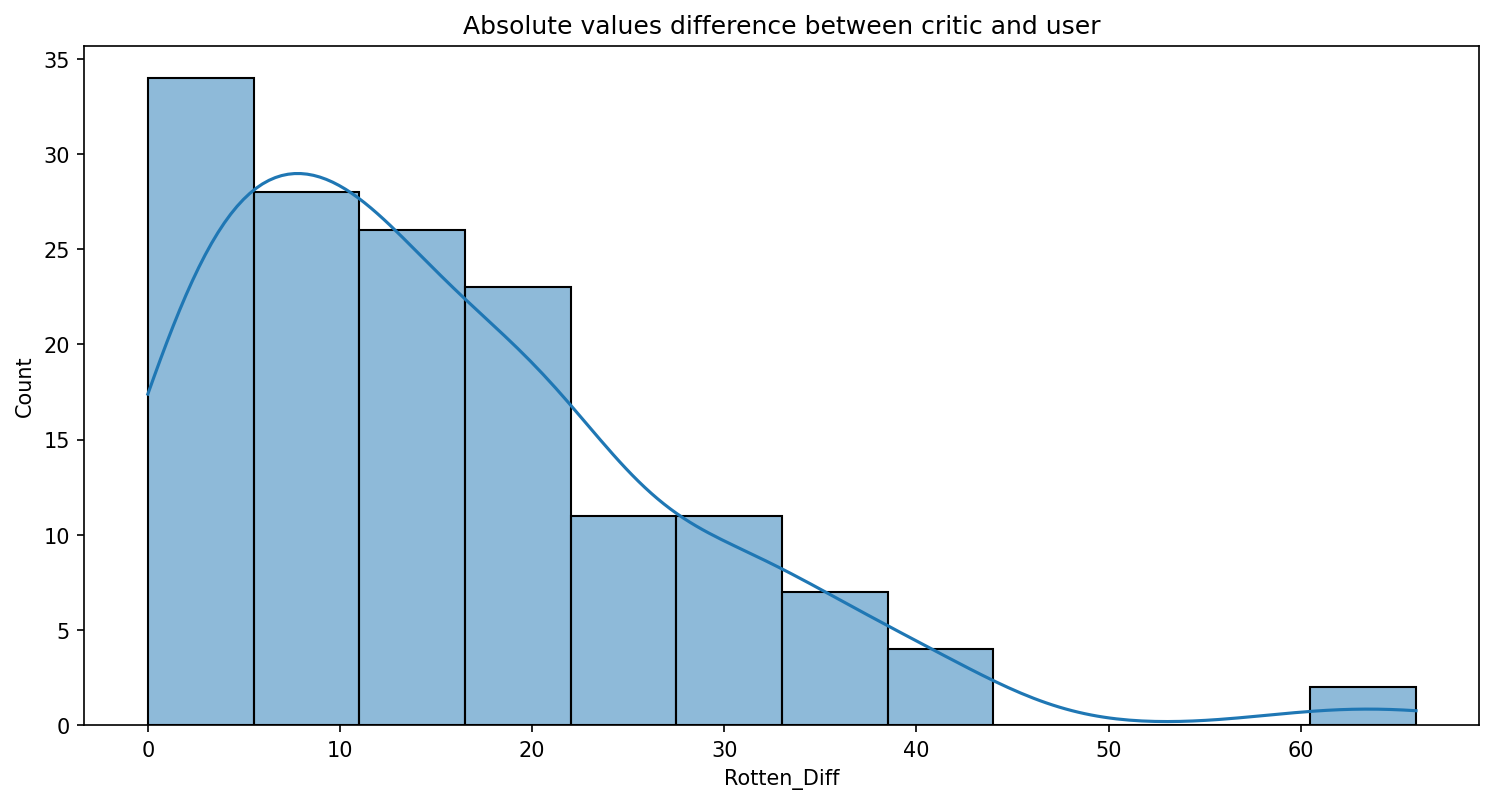

In [163]:
# plot with the absolute values difference 
adjust_plot_size()
sns.histplot(data=df_all_sites["Rotten_Diff"].apply(abs),kde=True)
plt.title("Absolute values difference between critic and user")

Let's find out which movies are causing the largest difference, 

the movies with high negative values will be the one, where user rated more than critic and
movies with hight positive values critic score > user's score.

In [164]:
# movies with higher score from critic than user
df_all_sites.nsmallest(5,"Rotten_Diff")[["FILM","Rotten_Diff"]]

,FILM,Rotten_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
105,Hitman: Agent 47 (2015),-42
134,The Longest Ride (2015),-42
125,The Wedding Ringer (2015),-39


In [165]:
# movies with higher score from user than critic
df_all_sites.nlargest(5,"Rotten_Diff")[["FILM","Rotten_Diff"]]

,FILM,Rotten_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
37,Welcome to Me (2015),24
40,I'll See You In My Dreams (2015),24


##### MetaCritic

MetaCritic also show the rating from the official critics and users.

<AxesSubplot:xlabel='Metacritic', ylabel='Metacritic_User'>

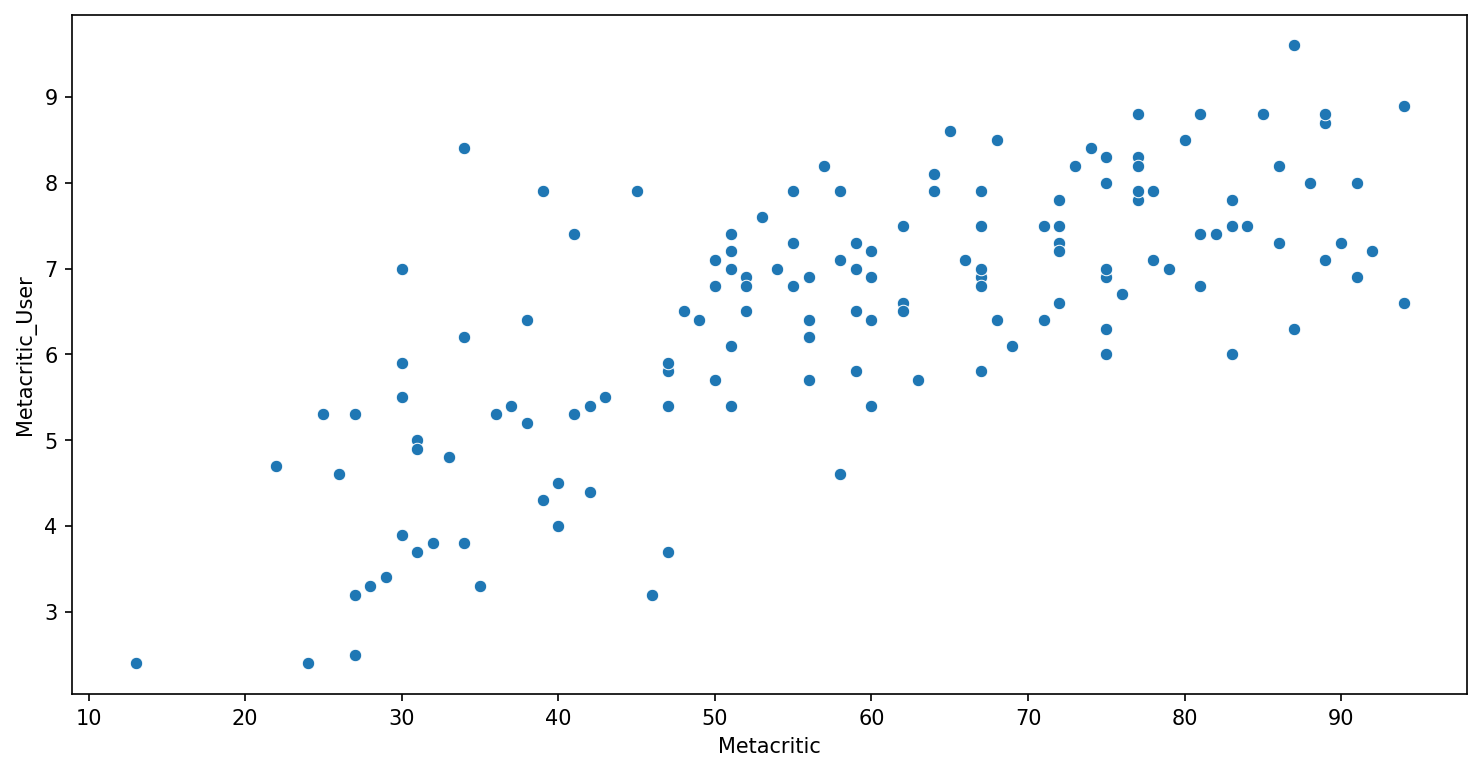

In [166]:
adjust_plot_size()
sns.scatterplot(data=df_all_sites,x="Metacritic", y="Metacritic_User")

#### IMDB
Let's explore IMDB as well, notice both MetaCritic and IMDB returns the vote count as well. We can analyze most popular movies by vote count

<AxesSubplot:xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

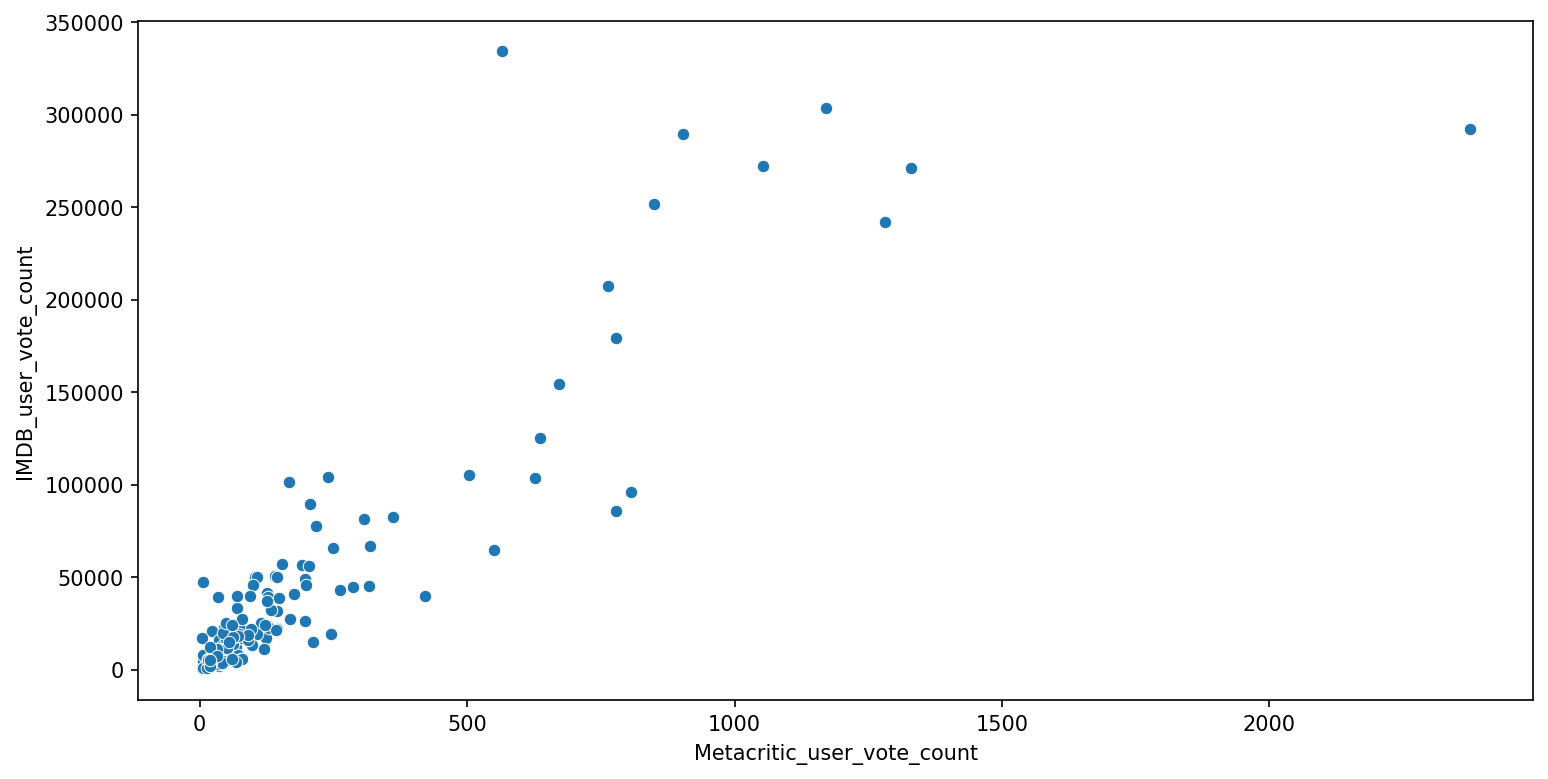

In [167]:
# Vote count on MetaCritic VS IMDB
adjust_plot_size()
sns.scatterplot(data=df_all_sites,x="Metacritic_user_vote_count", y="IMDB_user_vote_count")



Notice there are two outliers here, Let's find out the movies.

In [168]:
# Highest IMDB vote count and 500 meta critic vote count
df_all_sites.nlargest(1,"IMDB_user_vote_count")
# The Lmitation Game! - Can you blame the users for that? I would have gave 10/10 too!

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


In [169]:
# Movie with highest Metacritic Votes
df_all_sites.nlargest(1,"Metacritic_user_vote_count")

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


### Fandango score VS All Site scores

Now finally, Let's find out if fandango really displayed the higher ratings to boost the 
tickets booking ? 

In [170]:
# Merge fandango table with all site
# we want movie which are in both tables so "inner join"

df = pd.merge(df_fandango,df_all_sites,how="inner",on="FILM")

In [171]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8


In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    object 
 5   RottenTomatoes              145 non-null    int64  
 6   RottenTomatoes_User         145 non-null    int64  
 7   Metacritic                  145 non-null    int64  
 8   Metacritic_User             145 non-null    float64
 9   IMDB                        145 non-null    float64
 10  Metacritic_user_vote_count  145 non-null    int64  
 11  IMDB_user_vote_count        145 non-null    int64  
 12  Rotten_Diff                 145 non-null    int64  
dtypes: float64(4), int64(7), object(2)


In [173]:
df.describe()

,STARS,RATING,VOTES,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,4.086207,3.841379,3817.696552,60.634483,63.696552,58.696552,6.508966,6.729655,184.489655,42572.186207,-3.062069
std,0.541169,0.502437,6368.668671,30.161098,19.974749,19.538183,1.510883,0.957944,317.361740,67558.506121,19.218488
min,3.000000,2.700000,35.000000,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000,-66.000000
25%,3.500000,3.500000,218.000000,31.000000,50.000000,43.000000,5.700000,6.300000,33.000000,5626.000000,-14.000000
50%,4.000000,3.900000,1430.000000,63.000000,66.000000,59.000000,6.800000,6.900000,72.000000,18986.000000,0.000000
75%,4.500000,4.200000,4279.000000,89.000000,81.000000,75.000000,7.500000,7.400000,167.000000,44711.000000,11.000000
max,5.000000,4.800000,34846.000000,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000,42.000000


##### Notice here, other sites does not use score between 0-5 for movies, for the fair comparison we have to normalize the score to 0-5

In [174]:
# simple way to do it is to divide the values by 20
# 100 / 20  = 5
# 10 / 2 = 5

In [175]:
df["RottenTomatoes_norm"] = np.round(df["RottenTomatoes"] / 20,1)

In [176]:
df["Metacritic_User_norm"] = np.round(df["Metacritic_User"] / 2,1)
df["Metacritic_norm"] = np.round(df["Metacritic"] / 20,1)
df["IMDB_norm"] = np.round(df["IMDB"] / 2,1)
df["RottenTomatoes_User_norm"] = np.round(df["RottenTomatoes_User"] / 20,1)


In [177]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,RottenTomatoes_norm,Metacritic_User_norm,Metacritic_norm,IMDB_norm,RottenTomatoes_User_norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,1.2,1.6,2.3,2.1,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,3.6,3.5,3.0,3.6,4.0
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,3.6,3.3,3.6,3.7,4.2
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,4.0,3.4,3.4,3.7,4.2
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,4.9,4.4,4.7,4.3,4.5


In [178]:
df.columns

Index(['FILM', 'STARS', 'RATING', 'VOTES', 'YEAR', 'RottenTomatoes',
       'RottenTomatoes_User', 'Metacritic', 'Metacritic_User', 'IMDB',
       'Metacritic_user_vote_count', 'IMDB_user_vote_count', 'Rotten_Diff',
       'RottenTomatoes_norm', 'Metacritic_User_norm', 'Metacritic_norm',
       'IMDB_norm', 'RottenTomatoes_User_norm'],
      dtype='object')

In [179]:
# get all the normalised score
norms = df[['STARS', 'RATING', 'RottenTomatoes_norm', 'Metacritic_User_norm', 'Metacritic_norm',
       'IMDB_norm', 'RottenTomatoes_User_norm']]

In [180]:
norms.head()

,STARS,RATING,RottenTomatoes_norm,Metacritic_User_norm,Metacritic_norm,IMDB_norm,RottenTomatoes_User_norm
0,4.0,3.9,1.2,1.6,2.3,2.1,2.1
1,4.5,4.5,3.6,3.5,3.0,3.6,4.0
2,5.0,4.8,3.6,3.3,3.6,3.7,4.2
3,5.0,4.8,4.0,3.4,3.4,3.7,4.2
4,4.5,4.5,4.9,4.4,4.7,4.3,4.5


#### Comparing Fandango score with other sites

Now that we know it shows displayed ratings higher than the stars but 
does rating themselves are higher than average? 

In [198]:
# https://github.com/mwaskom/seaborn/issues/2280

def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)    

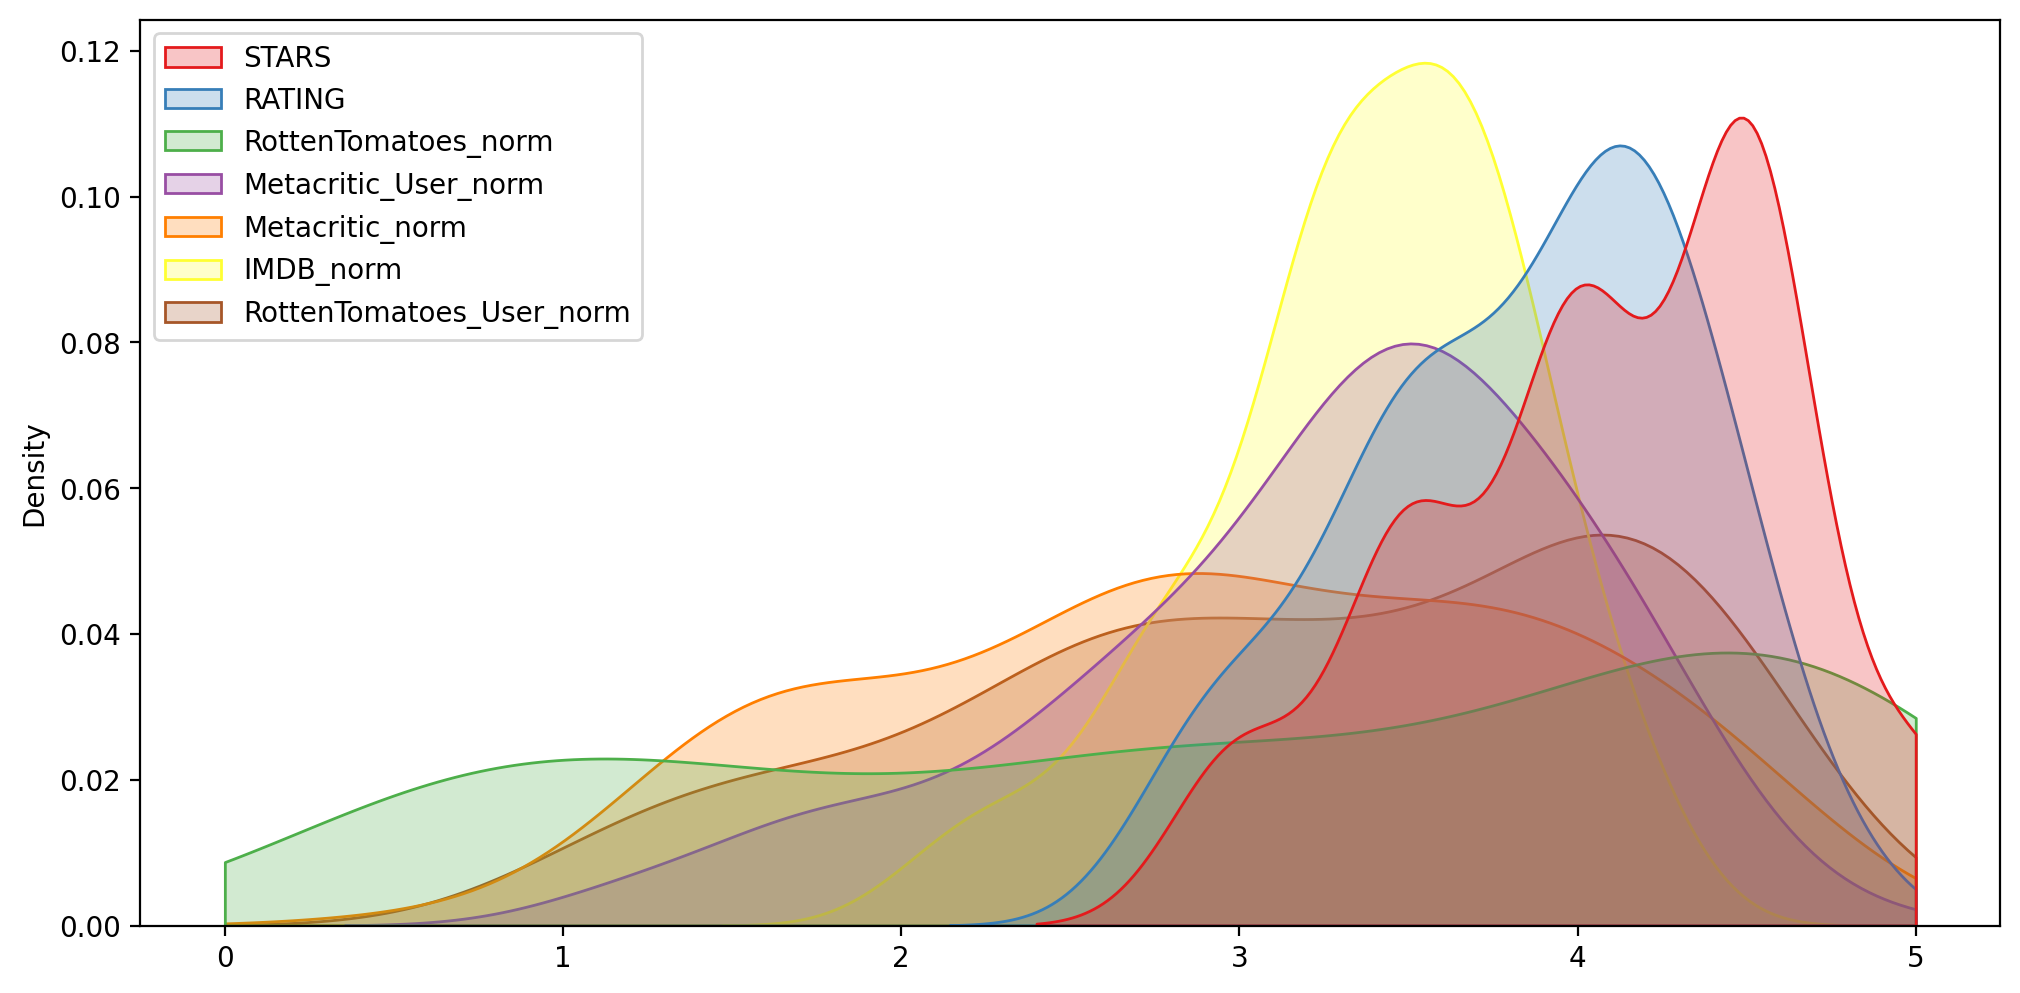

In [200]:
fig,axes = plt.subplots(figsize=(12,6),dpi = 200)
sns.kdeplot(data=norms, fill=True, palette= "Set1", clip=[0,5], ax=axes)
move_legend(axes, "upper left")


#### Clearly fandango has uneven distribution

##### We can see that Rotten Tomato critic has most uniform distribution, let's directly compare with it

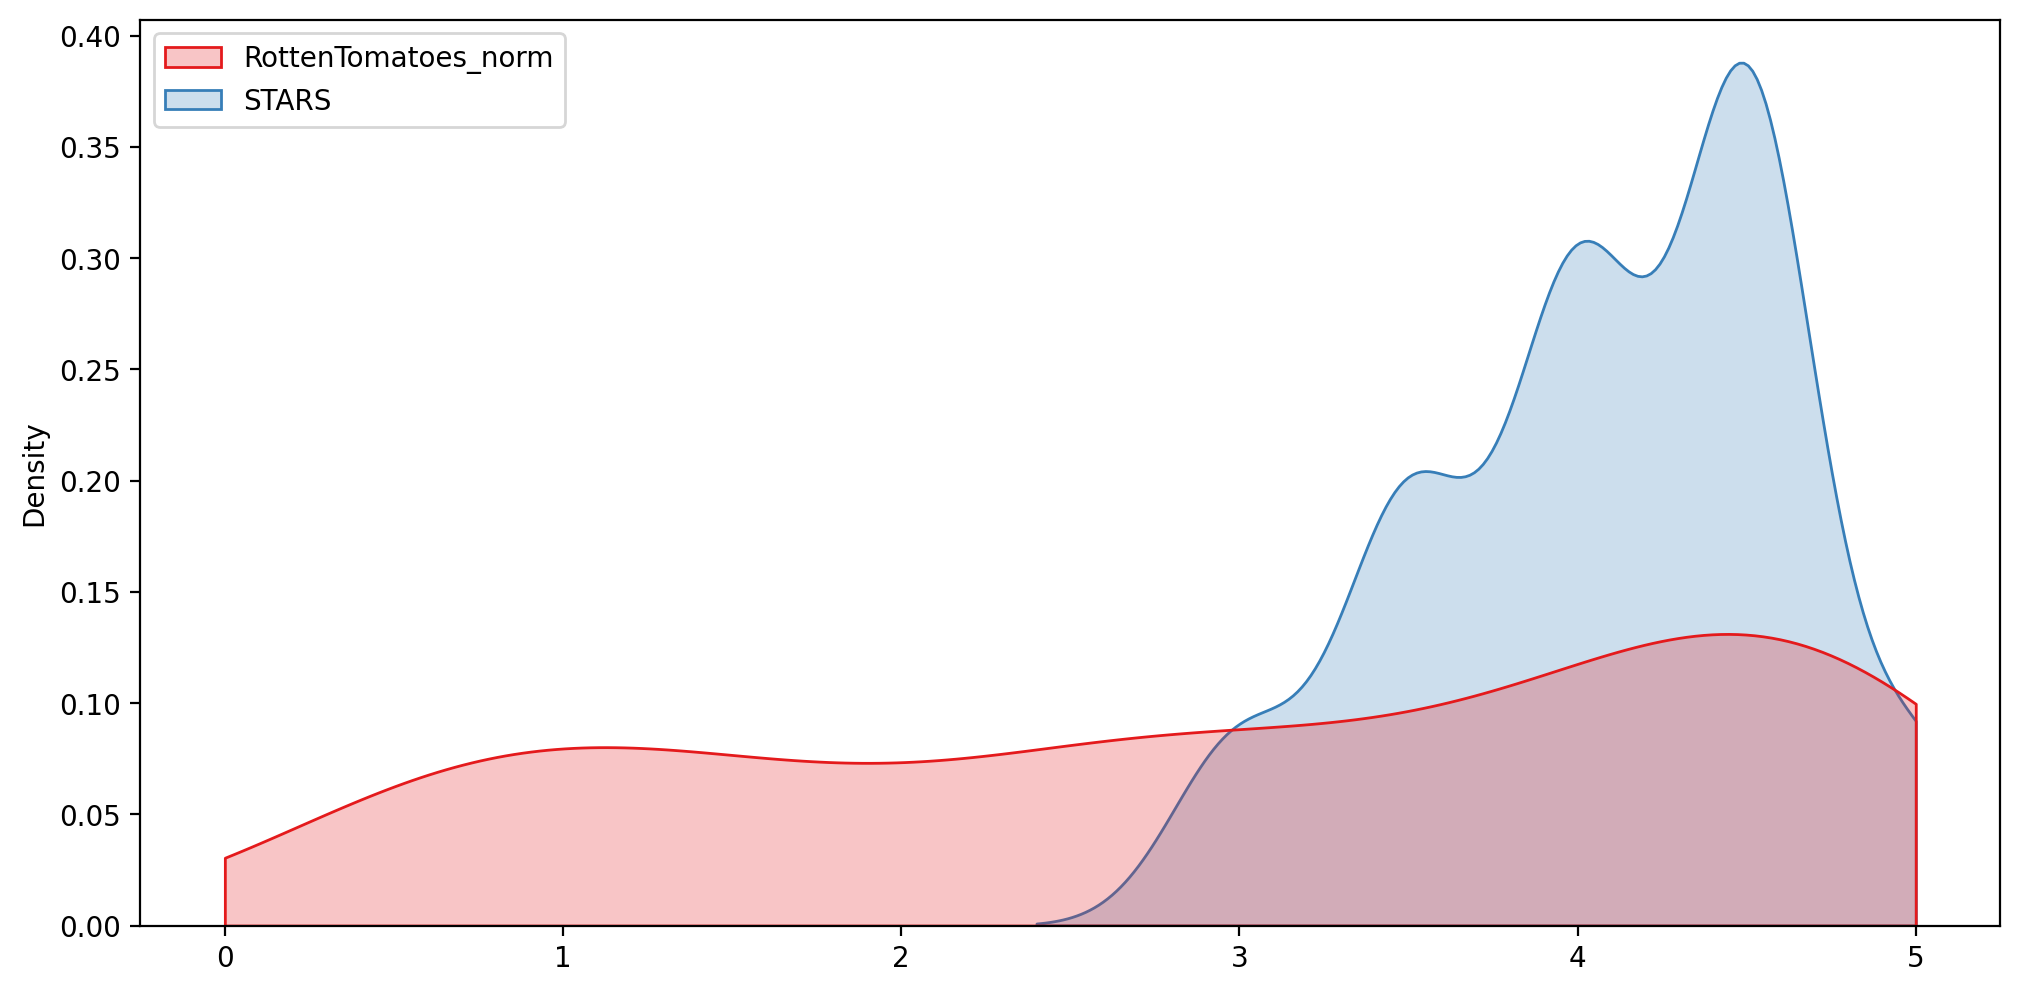

In [201]:
fig,axes = plt.subplots(figsize=(12,6),dpi = 200)
sns.kdeplot(data=norms[["RottenTomatoes_norm","STARS"]], fill=True, palette= "Set1", clip=[0,5], ax=axes)
move_legend(axes, "upper left")

    From the above plots we can observe that, Fandango is rating movies differently than other sites, it has more biased scores.

In [203]:
norms.head()

,STARS,RATING,RottenTomatoes_norm,Metacritic_User_norm,Metacritic_norm,IMDB_norm,RottenTomatoes_User_norm
0,4.0,3.9,1.2,1.6,2.3,2.1,2.1
1,4.5,4.5,3.6,3.5,3.0,3.6,4.0
2,5.0,4.8,3.6,3.3,3.6,3.7,4.2
3,5.0,4.8,4.0,3.4,3.4,3.7,4.2
4,4.5,4.5,4.9,4.4,4.7,4.3,4.5


In [204]:
## Cluster map
## Highly rated movies should be clustered with each other
## Same goes for poorly rated movies those should be clustered with each other as well.

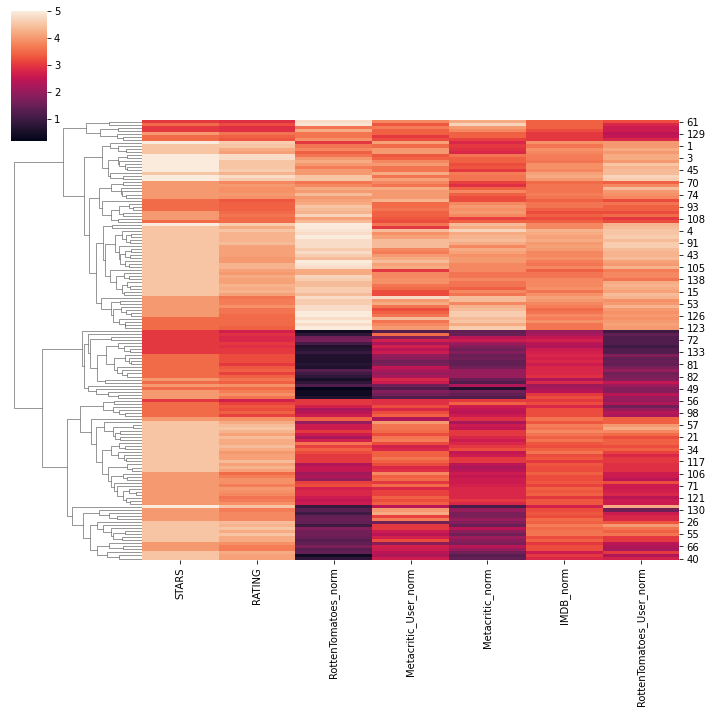

In [205]:
sns.clustermap(data=norms, col_cluster=False)

Clearly fandango ratings are standing out from the other sites, it is giving the higher 
rating to the movies, as we know it displays the rounded up version of scores. 

Let's find out the scores for top 10 worst movies by rating on other site and fandango 
and compare the results.

In [211]:
# as we know rotten tomato critic has most uniform distribution we will use
# it's score to get top 10 worst movies
norms = norms.copy()
norms["FILM"] = df["FILM"]

norms.nsmallest(10,"RottenTomatoes_norm")

,STARS,RATING,RottenTomatoes_norm,Metacritic_User_norm,Metacritic_norm,IMDB_norm,RottenTomatoes_User_norm,FILM
49,3.5,3.5,0.2,1.2,0.6,2.2,1.8,Paul Blart: Mall Cop 2 (2015)
25,4.5,4.1,0.4,2.3,1.3,3.0,2.3,Taken 3 (2015)
28,3.0,2.7,0.4,1.2,1.4,2.0,1.0,Fantastic Four (2015)
54,4.0,3.7,0.4,1.8,1.6,2.4,1.8,Hot Pursuit (2015)
84,4.0,3.9,0.4,1.6,1.4,3.0,2.4,Hitman: Agent 47 (2015)
50,4.0,3.6,0.5,2.8,1.5,2.3,1.8,The Boy Next Door (2015)
77,3.5,3.2,0.6,2.0,1.5,2.8,1.8,Seventh Son (2015)
78,3.5,3.2,0.6,1.6,1.4,2.8,1.5,Mortdecai (2015)
83,3.5,3.3,0.6,2.5,1.6,2.8,1.7,Sinister 2 (2015)
87,3.5,3.2,0.6,1.9,1.6,2.7,1.4,Unfinished Business (2015)


### Finally visualize the distribution of ratings across the the sites for the top 10 worst movies by score

<AxesSubplot:ylabel='Density'>

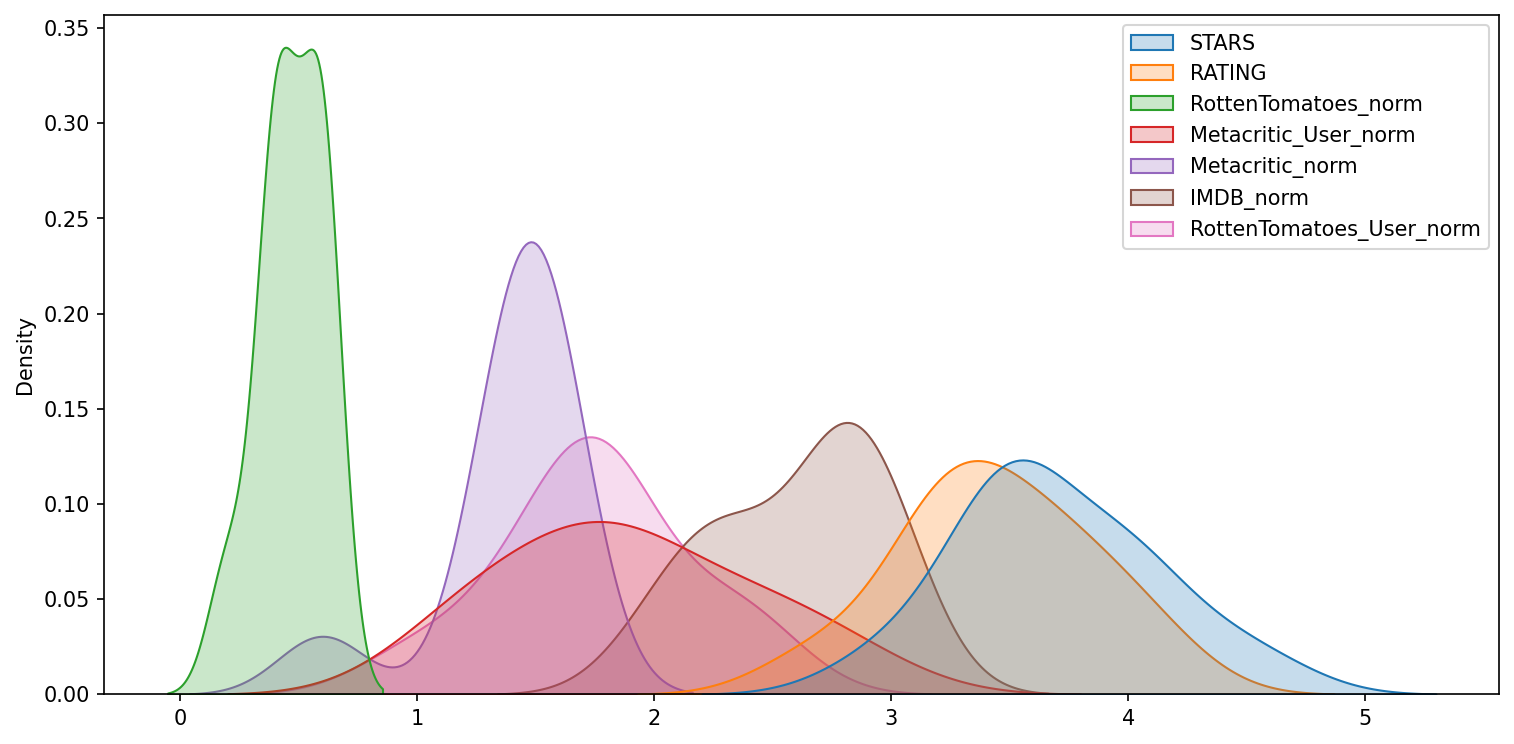

In [212]:
adjust_plot_size()
worst_films = norms.nsmallest(10,"RottenTomatoes_norm").drop("FILM",axis=1)
sns.kdeplot(data=worst_films, fill=True)

    Fandango is showing the ratings around 3-4 for the movies which are clearly bad.

Here is the biggest offender, TAKEN 3
Fandango is displaying rating of 4.5 stars, where on other sites film has average rating of
1.8 only


<div style="text-align:center"><img src="https://upload.wikimedia.org/wikipedia/en/6/6f/Taken_3_poster.jpg">
</div>


In [214]:
norms.iloc[25]

STARS                                  4.5
RATING                                 4.1
RottenTomatoes_norm                    0.4
Metacritic_User_norm                   2.3
Metacritic_norm                        1.3
IMDB_norm                              3.0
RottenTomatoes_User_norm               2.3
FILM                        Taken 3 (2015)
Name: 25, dtype: object

In [217]:
(0.4 + 2.3 + 1.3 + 3.0 + 2.3) / 5

1.86

In [218]:
# Thank you!